In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("income.xlsx",names=["name","age","income"])
df

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


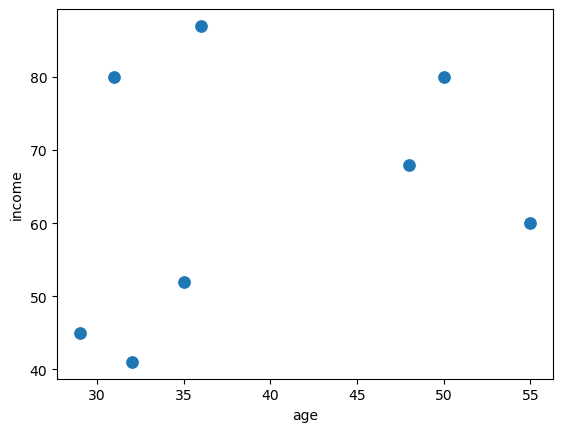

In [3]:
sns.scatterplot(df, x="age",y="income",s=100)
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters=3, linkage ="average")
hc.fit(df[['age','income']])
hc.labels_

array([1, 0, 1, 1, 2, 0, 2, 0], dtype=int64)

In [5]:
df['cluster'] = hc.labels_
df

,name,age,income,cluster
0,Rob,29,45,1
1,Andrea,50,80,0
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2
5,David,48,68,0
6,Ismail,31,80,2
7,Sheela,55,60,0


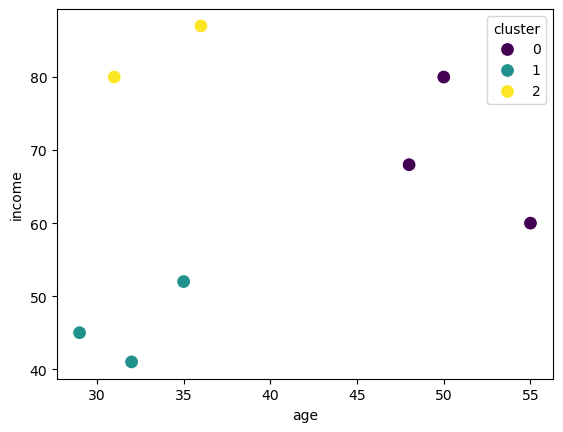

In [6]:
sns.scatterplot(df, x="age", y="income",s=100,palette = 'viridis',hue="cluster")
plt.show()

pip install scipy                         

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = df[['age','income']]
Z = linkage(X, method = "average")
Z                 # 0, 3 elements, 5 is euclidean, 2 merges

array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        , 10.31064935,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 16.39052659,  3.        ],
       [ 9.        , 12.        , 23.69824661,  5.        ],
       [10.        , 13.        , 33.65863823,  8.        ]])

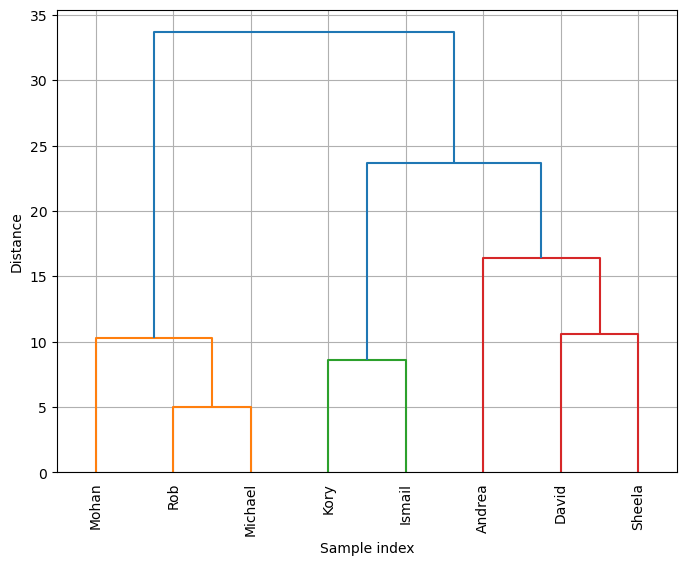

In [30]:
plt.figure(figsize=(8,6))
dendrogram(Z, labels = df["name"].values, leaf_rotation=90, leaf_font_size = 10)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.grid()
plt.show()

In [32]:
clusters = fcluster(Z, t = 3, criterion = 'maxclust')
clusters

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)

In [34]:
df["cluster"] = clusters
df

,name,age,income,cluster
0,Rob,29,45,1
1,Andrea,50,80,3
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2
5,David,48,68,3
6,Ismail,31,80,2
7,Sheela,55,60,3


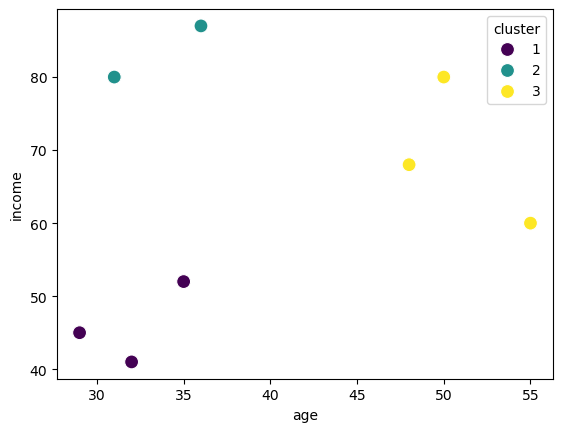

In [36]:
sns.scatterplot(df, x="age", y="income",s=100,palette = 'viridis',hue="cluster")
plt.show()

In [ ]:
# based on use case, we us linkage
# go though in scikit documentation